# What Factors Result in Effective Learning?

As every new school year begins, educators across the world renew their passion and drive for teaching, by learning new and exciting techniques to ensure a successful school year. Seminars are attended, books are bought, speakers are hired, and every teacher searches for new ways to help their students succeed in this constantly changing world. As much as techniques and teaching styles make a difference, there are still some core fundamental aspects that can make the difference in any student's ability to learn. The question is - what are these core fundamentals? What aspects of education can quantifiably be proven to increase students abilities to their fullest potential? 

To answer this, we can use a study from 2016 focusing on public schools in the New York area, do help us determine which factors should be focused on by schools to best help their students.

In [7]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 162
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Import our Dataframe, downloaded from kaggle.com
df = pd.read_csv('2016 School Explorer.csv', delimiter= ',')
df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [3]:
# This dataframe does require some cleaning, part of which is renaming some of the 
df.rename(columns = {'Trust %':'Trust_Percent',
                  'Rigorous Instruction %' : 'Rigorous_Instruction_Percent',
                  'Collaborative Teachers %': 'Collaborative_Teachers_Percent',
                  'Supportive Environment %': 'Supportive_Environment_Percent',
                  'Effective School Leadership %':'Effective_School_Leadership_Percent',
                  'Strong Family-Community Ties %':'Strong_Family_Community_Ties_Percent',
                  'Average Math Proficiency' : 'Average_Math_Proficiency',
                  'Average ELA Proficiency' : 'Average_ELA_Proficiency',
                  'School Income Estimate' : 'School_Income_Estimate',
                  'Percent of Students Chronically Absent' : 'Percent_Students_Chronically_Absent'  }, inplace = True)

In [4]:
#This dataframe has some missing data, and since there isn't too much to affect our sample size too greatly, we can remove 
#the rows that are missing crucial information
df = df.dropna(subset= ['Trust_Percent', 'Rigorous_Instruction_Percent', 'Collaborative_Teachers_Percent',
               'Supportive_Environment_Percent', 'Effective_School_Leadership_Percent','Strong_Family_Community_Ties_Percent',
               'Average_ELA_Proficiency','Average_Math_Proficiency', 'Percent_Students_Chronically_Absent'])

df = df[df.Trust_Percent != '0%']
df = df[df.Rigorous_Instruction_Percent != '0%']
df = df[df.Collaborative_Teachers_Percent != '0%']
df = df[df.Supportive_Environment_Percent != '0%']
df = df[df.Effective_School_Leadership_Percent != '0%']
df = df[df.Strong_Family_Community_Ties_Percent != '0%']
df = df[df.Percent_Students_Chronically_Absent != '0%']

#Additionally, in order to utilize some of our data, string manipulations are required to convert some of the recorded
# information into floats
df.Trust_Percent = df.Trust_Percent.str.replace('%', '')
df.Trust_Percent = df.Trust_Percent.astype(float)
df.Rigorous_Instruction_Percent = df.Rigorous_Instruction_Percent.str.replace('%', '')
df.Rigorous_Instruction_Percent = df.Rigorous_Instruction_Percent.astype(float)
df.Collaborative_Teachers_Percent = df.Collaborative_Teachers_Percent.str.replace('%', '')
df.Collaborative_Teachers_Percent = df.Collaborative_Teachers_Percent.astype(float)
df.Supportive_Environment_Percent = df.Supportive_Environment_Percent.str.replace('%', '')
df.Supportive_Environment_Percent = df.Supportive_Environment_Percent.astype(float)
df.Effective_School_Leadership_Percent = df.Effective_School_Leadership_Percent.str.replace('%', '')
df.Effective_School_Leadership_Percent = df.Effective_School_Leadership_Percent.astype(float)
df.Strong_Family_Community_Ties_Percent = df.Strong_Family_Community_Ties_Percent.str.replace('%','')
df.Strong_Family_Community_Ties_Percent = df.Strong_Family_Community_Ties_Percent.astype(float)
df.School_Income_Estimate = df.School_Income_Estimate.str.replace('$', '')
df.School_Income_Estimate = df.School_Income_Estimate.str.replace(',', '')
df.School_Income_Estimate = df.School_Income_Estimate.astype(float)
df.Percent_Students_Chronically_Absent = df.Percent_Students_Chronically_Absent.str.replace('%', '')
df.Percent_Students_Chronically_Absent = df.Percent_Students_Chronically_Absent.astype(float)

df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School_Income_Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent_Students_Chronically_Absent,Rigorous_Instruction_Percent,Rigorous Instruction Rating,Collaborative_Teachers_Percent,Collaborative Teachers Rating,Supportive_Environment_Percent,Supportive Environment Rating,Effective_School_Leadership_Percent,Effective School Leadership Rating,Strong_Family_Community_Ties_Percent,Strong Family-Community Ties Rating,Trust_Percent,Trust Rating,Student Achievement Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or Afri

### What does the data show us?
The dataframe we are using has some categories already determined that schools use as a metric for success. 6 of those metrics are measurements of trust, rigorous instruction, collaborative teaching, supportive environment, effective school leadership, and the strength of the ties between the family and community. Let's graph these six different metrics opposite the English language scores and the math scores of all our schools

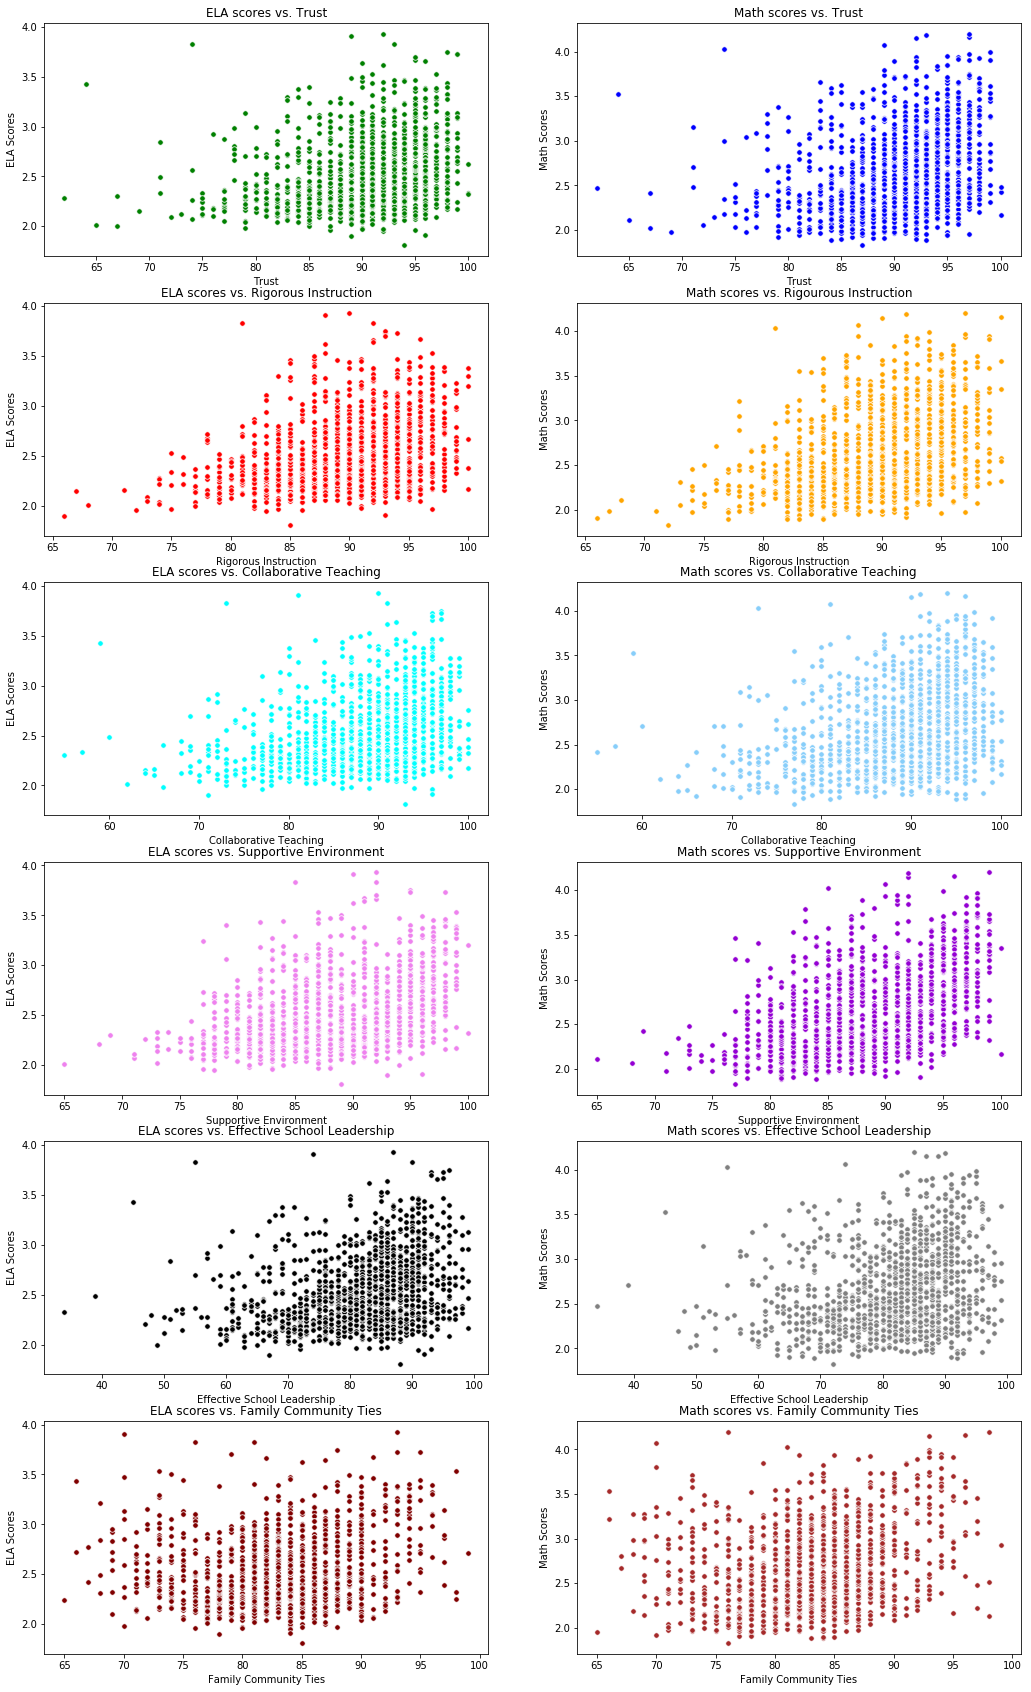

In [38]:
plt.figure(figsize=(17.5, 30))

plt.subplot(6,2,1)
sns.scatterplot(data = df, x = 'Trust_Percent', y = 'Average_ELA_Proficiency', color = 'green', s = 30)
plt.title('ELA scores vs. Trust')
plt.xlabel('Trust')
plt.ylabel('ELA Scores')

plt.subplot(6,2,2)
sns.scatterplot(data = df, x = 'Trust_Percent', y = 'Average_Math_Proficiency', color = 'blue', s = 30)
plt.title('Math scores vs. Trust')
plt.xlabel('Trust')
plt.ylabel('Math Scores')

plt.subplot(6,2,3)
sns.scatterplot(data = df, x = 'Rigorous_Instruction_Percent', y = 'Average_ELA_Proficiency', color = 'red', s = 30)
plt.title('ELA scores vs. Rigorous Instruction')
plt.xlabel('Rigorous Instruction')
plt.ylabel('ELA Scores')

plt.subplot(6,2,4)
sns.scatterplot(data = df, x = 'Rigorous_Instruction_Percent', y = 'Average_Math_Proficiency', color = 'orange', s = 30)
plt.title('Math scores vs. Rigourous Instruction')
plt.xlabel('Rigorous Instruction')
plt.ylabel('Math Scores')

plt.subplot(6,2,5)
sns.scatterplot(data = df, x = 'Collaborative_Teachers_Percent', y = 'Average_ELA_Proficiency', color = 'aqua', s = 30)
plt.title('ELA scores vs. Collaborative Teaching')
plt.xlabel('Collaborative Teaching')
plt.ylabel('ELA Scores')

plt.subplot(6,2,6)
sns.scatterplot(data = df, x = 'Collaborative_Teachers_Percent', y = 'Average_Math_Proficiency', color = 'lightskyblue', s = 30)
plt.title('Math scores vs. Collaborative Teaching')
plt.xlabel('Collaborative Teaching')
plt.ylabel('Math Scores')

plt.subplot(6,2,7)
sns.scatterplot(data = df, x = 'Supportive_Environment_Percent', y = 'Average_ELA_Proficiency', color = 'violet', s = 30)
plt.title('ELA scores vs. Supportive Environment')
plt.xlabel('Supportive Environment')
plt.ylabel('ELA Scores')

plt.subplot(6,2,8)
sns.scatterplot(data = df, x = 'Supportive_Environment_Percent', y = 'Average_Math_Proficiency', color = 'darkviolet', s = 30)
plt.title('Math scores vs. Supportive Environment')
plt.xlabel('Supportive Environment')
plt.ylabel('Math Scores')

plt.subplot(6,2,9)
sns.scatterplot(data = df, x = 'Effective_School_Leadership_Percent', y = 'Average_ELA_Proficiency', color = 'black', s = 30)
plt.title('ELA scores vs. Effective School Leadership')
plt.xlabel('Effective School Leadership')
plt.ylabel('ELA Scores')

plt.subplot(6,2,10)
sns.scatterplot(data = df, x = 'Effective_School_Leadership_Percent', y = 'Average_Math_Proficiency', color = 'gray', s = 30)
plt.title('Math scores vs. Effective School Leadership')
plt.xlabel('Effective School Leadership')
plt.ylabel('Math Scores')

plt.subplot(6,2,11)
sns.scatterplot(data = df, x = 'Strong_Family_Community_Ties_Percent', y = 'Average_ELA_Proficiency', color = 'maroon', s = 30)
plt.title('ELA scores vs. Family Community Ties')
plt.xlabel('Family Community Ties')
plt.ylabel('ELA Scores')

plt.subplot(6,2,12)
sns.scatterplot(data = df, x = 'Strong_Family_Community_Ties_Percent', y = 'Average_Math_Proficiency', color = 'brown', s = 30)
plt.title('Math scores vs. Family Community Ties')
plt.xlabel('Family Community Ties')
plt.ylabel('Math Scores')

plt.tight_layout
plt.show()


The information from these graphs help us understand which of these 6 metrics have an actual effect on scores. It seems that family - community ties have little to no effect on student production when the data is presented. However, the remaining 5 metrics illustrate an upward trend, emphasizing that as each of them increases, so do students scores. The issue that remains is that we cannot be certain as to which of these 5 metrics has the strongest effect. To figure this out, we must create an experiment.

## Determining the Best Metric

How do we determine the best metric? Well, we can use a long term A/B test for our schools to do this. We have a very large sample size. As a result, we have plenty of schools with lower scores in each of the 5 metrics. So, we propose to the school system to partake in an A/B test. For an example, we'll start with trust percentage. Looking at the graph, we can safely assume there are at least 40 schools that have ELA scores lower than 2.5 and Trust percentages lower than 80 percent. Given those facts, we can then split the group into two separate groups. One group of schools will continue on their natural course, while the other group will be given specialized training to the staff in order to increase trust within the school. This process would continue for 3 years, with active training continuing throughout all 3 years. At the end, we would compare the data between the schools to determine if there was an increase in school averages between the two groups. This experiment would also be conducted for the 4 other metrics simultaneously, with careful documentation to prevent overlap that could skew the data (we don't want a school that is a control group in one experiment being the same school that goes through a change in another experiment. In all likelihood. A few schools would be controls, and 5 other groups would experience increases in each of the 5 metrics.) Once the experiment is concluded, the data would have to be compared, and then it would have to go through a t - test to conclude if the change in scores was significant. Hopefully, with a large enough sample of students, you could determine which metric has the strongest effect, and then all 5 could be ranked in regards to their effectiveness. It is important to have as much variability in the actual student body, (which is a factor that is recorded in out data set), so as to avoid any external causes that could potentially skew our data. 